In [1]:
# activate line execution
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# general
import numpy as np
import pandas as pd
import math
# import matplotlib.pyplot as plt
import os
import shutil
import pickle

# plotly
import plotly.express as px  # (version 4.7.0 or higher)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# import custom libraries
import sys
# sys.path.append("C:\\DATA\\Tasks\\lib\\hk")
# import hk_utils

# folder paths
ADD_DATA = "C:\\DATA\\data\\raw\\mimic4\\lookup\\"
ADD_DATA_proc = "C:/DATA/data/processed/"


PATH_PAPER = "C:\\DATA\\Tasks\\220704\\Alternate-Transactions-Articles-LaTeX-template\\images\\"


PATH_SYS="/mlodata1/hokarami/tedam/"

In [4]:
# libraries for THP

import argparse
import numpy as np
import pickle
import time
import torch
import torch.nn as nn
import torch.optim as optim
# from torch.utils.tensorboard import SummaryWriter

import transformer.Constants as Constants
import Utils

# from preprocess.Dataset import get_dataloader, get_dataloader2
# from transformer.Models import Transformer
# from transformer.hk_transformer import Transformer
from tqdm import tqdm

# from torchinfo import summary

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# torch.cuda.empty_cache()
# torch.cuda.memory_allocated()
# torch.cuda.memory_reserved()

from sklearn import metrics
# from hk_pytorch import save_checkpoint,load_checkpoint
# import hk_pytorch


# from custom2 import myparser
import re

In [5]:
import Main
import webbrowser


In [6]:
import io

In [7]:
from tsnecuda import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE

In [8]:
# !pip install wandb -qqq
import wandb
# wandb.login()
api = wandb.Api()
import os

os.environ["WANDB_API_KEY"] = "0f780ac8a470afe6cb7fc474ff3794772c660465"

os.environ["WANDB_NOTEBOOK_NAME"] = "jup_res"

# Functions

In [9]:
import io
import base64
import pickle
import gzip

import numpy as np

from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output, no_update
import plotly.graph_objects as go

from PIL import ImageDraw, Image

from sklearn.manifold import TSNE

# Helper functions
def np_image_to_base64(im_matrix,scale=4):

    im_matrix = np.repeat(np.repeat(im_matrix,scale,axis=0),scale,axis=1)
    im = Image.fromarray(im_matrix)
    buffer = io.BytesIO()
    im.save(buffer, format="jpeg")
    encoded_image = base64.b64encode(buffer.getvalue()).decode()
    im_url = "data:image/jpeg;base64, " + encoded_image
    return im_url




def binary_matrix_to_image(binary_matrix, grid_size=8, border_size=1):
    # Calculate the size of the output image based on the size of the binary matrix
    height, width = binary_matrix.shape[:2]
    image_width = width * grid_size + (width + 1) * border_size
    image_height = height * grid_size + (height + 1) * border_size
    
    # Create a new image and a draw object to draw the grid and borders
    image = Image.new('RGB', (image_width, image_height), color='black')
    draw = ImageDraw.Draw(image)
    
    # Draw the white grids
    for i in range(height):
        for j in range(width):
            if binary_matrix[i, j] == 1:
                x1 = j * (grid_size + border_size) + border_size
                y1 = i * (grid_size + border_size) + border_size
                x2 = x1 + grid_size
                y2 = y1 + grid_size
                draw.rectangle((x1, y1, x2, y2), fill='white')
    
    # Draw the black borders
    for i in range(height + 1):
        y = i * (grid_size + border_size)
        draw.line((0, y, image_width, y), fill='white', width=border_size)
        
    for j in range(width + 1):
        x = j * (grid_size + border_size)
        draw.line((x, 0, x, image_height), fill='white', width=border_size)
        
    return image

In [10]:
import numpy as np
from PIL import ImageDraw, Image, ImageFont

def binary_matrix_to_image(binary_matrix, row_labels=None, font_path=None, grid_size=10, border_size=1, label_size=15):
    # Add a dummy column to the binary matrix
    ddd=2

    height, width = binary_matrix.shape[:2]
    binary_matrix = np.concatenate((np.zeros((height, ddd)), binary_matrix), axis=1)
    width += ddd
    
    # Calculate the size of the output image based on the size of the binary matrix
    image_width = (width + 1) * grid_size + (width + 2) * border_size
    image_height = height * grid_size + (height + 1) * border_size
    
    # Create a new image and a draw object to draw the grid and borders
    image = Image.new('RGB', (image_width, image_height), color='black')
    draw = ImageDraw.Draw(image)
    
    # Draw the white grids
    for i in range(height):
        for j in range(1, width):
            if binary_matrix[i, j] == 1:
                x1 = j * (grid_size + border_size) + border_size
                y1 = i * (grid_size + border_size) + border_size
                x2 = x1 + grid_size
                y2 = y1 + grid_size
                draw.rectangle((x1, y1, x2, y2), fill='white')
    
    # Draw the black borders
    for i in range(height + 1):
        y = i * (grid_size + border_size)
        draw.line((grid_size, y, image_width, y), fill='white', width=border_size)
        
    for j in range(width + 1):
        x = j * (grid_size + border_size)
        draw.line((x, 0, x, image_height), fill='white', width=border_size)
    
    # Draw the row labels
    if row_labels is not None:
        font = ImageFont.truetype(PATH_SYS+'arial.ttf', size=label_size)
        max_label_width = max([font.getsize(str(label))[0] for label in row_labels])
        label_x = 0
        label_y = border_size
        for i, label in enumerate(row_labels):
            draw.text((label_x, label_y), str(label), font=font, fill='white',align="right")
            label_y += grid_size + border_size
            # if i == 0:
            #     label_x += max_label_width + border_size + grid_size
        
    return image


# Model path

In [11]:
runs_path=[
# "hokarami/TEEDAM_supervised/5uzxzoxd",
"hokarami/TEEDAM_supervised/sb9zf1mm",
"hokarami/TEEDAM_supervised/hue1qxw4",  # seft [Q10-TE__nextmark-concat]1566371
# "hokarami/TEEDAM_unsupervised_timeCat/66pgiau2",

# "hokarami/TEEDAM_unsupervised_timeCat/j2ck0i9i",

]

run_path = runs_path[-1]
run_path


run = api.run(run_path)
for file in run.files():
    file.download(replace=True,root='./local/')

'hokarami/TEEDAM_supervised/hue1qxw4'

<_io.TextIOWrapper name='./local/artifact/376657143/wandb_manifest.json' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/best_model.pkl' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/conda-environment.yaml' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/config.yaml' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/opt.pkl' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/output.log' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/requirements.txt' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/wandb-metadata.json' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./local/wandb-summary.json' mode='r' encoding='UTF-8'>

In [12]:
!pwd

/home/hokarami/tedam2


In [13]:
# os.listdir(add_data)[8:]





# run_path = runs_path[-1]

# os.listdir(run_path)

# # load opt file


opt = pickle.load(open('./local/opt.pkl','rb'))
# modify opt

opt.data=PATH_SYS+'p12-seft/'
opt = Main.config(opt, justLoad=True)

checkpoint = torch.load('./local/best_model.pkl')
# # modify opt
# # opt = Main.config(opt, justLoad=True)




############################## CUDA True
[Info] INPUT TE --> none-mark-label
[Info] parameters: Namespace(data='/mlodata1/hokarami/tedam/p12-seft/', data_label='multilabel', cuda=1, wandb=True, wandb_project='TEEDAM_supervised', log_freq=1, prof=False, per=100, balanced_batch=True, transfer_learning='', freeze='', ES_pat=100, setting='seft', test_center='', split='', log='log.txt', user_prefix='[Q10-TE__nextmark-concat]', pos_alpha=1.0, epoch=50, batch_size=128, lr=0.01, smooth=0.0, weight_decay=0.1, event_enc=1, time_enc='concat', te_d_mark=8, te_d_time=8, te_d_rnn=256, te_d_inner=16, te_d_k=8, te_d_v=8, te_n_head=4, te_n_layers=4, te_dropout=0.1, state=False, demo=True, num_states=1, noise=False, mod='none', int_dec='sahp', w_event=1.0, next_mark=1, w_class=False, w_pos=False, mark_detach=0, w_time=1.0, sample_label=1, w_pos_label=0.5, w_sample_label=100.0, hparams2write={'data': '/mlodata1/hokarami/tedam/p12/', 'data_label': 'multilabel', 'cuda': 1, 'wandb': True, 'wandb_project': '

## load pre-trained model

In [14]:
model = Main.ATHP(
       n_marks=opt.num_marks,
        TE_config = opt.TE_config,
        DAM_config = opt.DAM_config,
        NOISE_config = opt.NOISE_config,

        CIF_config = opt.CIF_config,
        next_time_config = opt.next_time_config,
        next_type_config = opt.next_type_config,
        label_config = opt.label_config,

        demo_config = opt.demo_config,

        device=opt.device,



    )
model.to(opt.device)



# optimizer = optim.Adam(filter(lambda x: x.requires_grad, model.parameters()),
#                            opt.lr, betas=(0.9, 0.999), eps=1e-05, weight_decay=opt.weight_decay)
    

model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# scheduler = optim.lr_scheduler.StepLR(optimizer, 10, gamma=0.5)

_ = model.eval()

ATHP(
  (TE): Encoder(
    (event_emb): Linear(in_features=25, out_features=8, bias=True)
    (layer_stack): ModuleList(
      (0): EncoderLayer(
        (slf_attn): MultiHeadAttention(
          (w_qs): Linear(in_features=16, out_features=32, bias=False)
          (w_ks): Linear(in_features=16, out_features=32, bias=False)
          (w_vs): Linear(in_features=16, out_features=32, bias=False)
          (fc): Linear(in_features=32, out_features=16, bias=True)
          (attention): ScaledDotProductAttention(
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (layer_norm): LayerNorm((16,), eps=1e-06, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (pos_ffn): PositionwiseFeedForward(
          (w_1): Linear(in_features=16, out_features=16, bias=True)
          (w_2): Linear(in_features=16, out_features=16, bias=True)
          (layer_norm): LayerNorm((16,), eps=1e-06, elementwise_affine=True)
          (dropout): Dropou

<All keys matched successfully>

In [15]:
dict_metrics,r_enc_list, out = Main.valid_epoch_tsne(model, opt.validloader, opt.pred_loss_func, opt)

In [16]:
len(r_enc_list)


r_enc_list[0].shape
model.d_out_te
model.d_out_dam
model.d_demo

X_te = np.concatenate(r_enc_list,axis=0)[:,:model.d_out_te]
X_dam = np.concatenate(r_enc_list,axis=0)[:,model.d_out_te:]

# X = np.concatenate(r_enc_list,axis=0)[:,:model.d_out_te+model.d_out_dam]
# X = np.concatenate(r_enc_list,axis=0)[:,:model.d_out_te]

X = np.concatenate(r_enc_list,axis=0)[:,:]

X.shape

14

torch.Size([128, 20])

16

0

4

(1792, 20)

In [17]:
if 'y_state_pred' in out:

    y_state_pred = out['y_state_pred']
    y_state_true = out['y_state_true']
    y_state_score = out['y_state_score']
else:
    y_state_pred = None
    y_state_true = None
    y_state_score = None

y_pred = out['y_pred']
y_true = out['y_true']
y_score = out['y_score']

non_pad_mask_list = out['non_pad_mask_list']
event_type_list = out['event_type_list']


In [18]:




if len(out['state_mod_list'])>0:

    res=list()
    n_cols = len(opt.dict_map_states.keys())+1

    state_mod_list = out['state_mod_list']
    state_time_list = out['state_time_list']
    len(state_mod_list)
    state_mod_list[0].shape

    for state_mod,state_time in zip(state_mod_list,state_time_list):
        xs = torch.unbind(state_time,0)
        ys = torch.unbind(state_mod,0)

        for x,y in zip(xs,ys):
            n_rows = x.int().max() + 1
            matrix = torch.zeros(n_rows, n_cols)
            matrix[x.long(), y] = 1
            res.append(matrix.cpu().numpy().transpose()) # [n_marks * times]

    res_labels = opt.dict_map_states.keys()

else:

    event_type_list[0].shape
    non_pad_mask_list[0].shape

    num_marks = event_type_list[0].shape[-1]


    res = list()

    for event_type, non_pad_mask in zip(event_type_list,non_pad_mask_list):

        temp = torch.unbind(event_type,0)
        lens = non_pad_mask.sum(1).long()

        for i,x in enumerate(temp):
            res.append( x[:lens[i],:].cpu().numpy().astype(np.uint8).transpose() )

    res_labels = opt.dict_map_events.keys()
        

torch.Size([128, 88, 25])

torch.Size([128, 88])

In [19]:
res[1].shape

len(res_labels)

    # idd = non_pad_mask.sum(1).long()-1
    # idd = idd[:,None,None].repeat(1,1,num_marks)

    # torch.gather(event_type,1,idd).squeeze().shape

len(res)

(25, 37)

25

1792

In [20]:
from PIL import Image

all_images=[]

for i,pattern in enumerate(res):
    image = Image.fromarray(pattern)


    # row_labels = opt.dict_map_states.keys()
    # image = binary_matrix_to_image(pattern, row_labels=row_labels, grid_size=50, border_size=2, label_size=20)
    # image.save(f'./local/images/img{i}.jpeg')

    all_images.append(f'./local/images/img{i}.jpeg')


# Visualizations

## TSNE of Learned Rep

In [21]:
TSNE_LIMIT = 6000



X.shape
all_colors = ["#52ef99", "#1c875c", "#69c8c1", "#4c707b", "#b6c5f5", "#1642cd", "#fb5de7", "#be64a7", "#62385e", "#edb1ff", "#860967", "#3d84e3", "#c5df72", "#6e3901", "#fba55c", "#9f2114", "#36e515", "#65a10e", "#474a09", "#f5603a", "#fa217f", "#4007d9",
"#52ef99", "#1c875c", "#69c8c1", "#4c707b", "#b6c5f5", "#1642cd", "#fb5de7", "#be64a7", "#62385e", "#edb1ff", "#860967", "#3d84e3", "#c5df72", "#6e3901", "#fba55c", "#9f2114", "#36e515", "#65a10e", "#474a09", "#f5603a", "#fa217f", "#4007d9",
"#52ef99", "#1c875c", "#69c8c1", "#4c707b", "#b6c5f5", "#1642cd", "#fb5de7", "#be64a7", "#62385e", "#edb1ff", "#860967", "#3d84e3", "#c5df72", "#6e3901", "#fba55c", "#9f2114", "#36e515", "#65a10e", "#474a09", "#f5603a", "#fa217f", "#4007d9",
"#52ef99", "#1c875c", "#69c8c1", "#4c707b", "#b6c5f5", "#1642cd", "#fb5de7", "#be64a7", "#62385e", "#edb1ff", "#860967", "#3d84e3", "#c5df72", "#6e3901", "#fba55c", "#9f2114", "#36e515", "#65a10e", "#474a09", "#f5603a", "#fa217f", "#4007d9",
"#52ef99", "#1c875c", "#69c8c1", "#4c707b", "#b6c5f5", "#1642cd", "#fb5de7", "#be64a7", "#62385e", "#edb1ff", "#860967", "#3d84e3", "#c5df72", "#6e3901", "#fba55c", "#9f2114", "#36e515", "#65a10e", "#474a09", "#f5603a", "#fa217f", "#4007d9",
"#52ef99", "#1c875c", "#69c8c1", "#4c707b", "#b6c5f5", "#1642cd", "#fb5de7", "#be64a7", "#62385e", "#edb1ff", "#860967", "#3d84e3", "#c5df72", "#6e3901", "#fba55c", "#9f2114", "#36e515", "#65a10e", "#474a09", "#f5603a", "#fa217f", "#4007d9",
"#52ef99", "#1c875c", "#69c8c1", "#4c707b", "#b6c5f5", "#1642cd", "#fb5de7", "#be64a7", "#62385e", "#edb1ff", "#860967", "#3d84e3", "#c5df72", "#6e3901", "#fba55c", "#9f2114", "#36e515", "#65a10e", "#474a09", "#f5603a", "#fa217f", "#4007d9",
"#52ef99", "#1c875c", "#69c8c1", "#4c707b", "#b6c5f5", "#1642cd", "#fb5de7", "#be64a7", "#62385e", "#edb1ff", "#860967", "#3d84e3", "#c5df72", "#6e3901", "#fba55c", "#9f2114", "#36e515", "#65a10e", "#474a09", "#f5603a", "#fa217f", "#4007d9"]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=10,n_jobs=4)
X_tsne = tsne.fit_transform(X[:TSNE_LIMIT,:])
# colors_tsne = [all_colors[label] for label in dict_metrics['tsne']['y_true'][:TSNE_LIMIT] ]
X_tsne.shape


X_dam_tsne = tsne.fit_transform(X_dam[:TSNE_LIMIT,:])
X_te_tsne = tsne.fit_transform(X_te[:TSNE_LIMIT,:])


(1792, 20)

(1792, 2)

In [22]:
id(X_dam_tsne)
id(X_te_tsne)
id(X_tsne)

139936489713360

139936490837744

139936489712688

In [23]:
df = pd.DataFrame()
df['x']=X_tsne[:,0]
df['y']=X_tsne[:,1]

# df['x']=X_te_tsne[:,0]
# df['y']=X_te_tsne[:,1]

# df['x']=X_dam_tsne[:,0]
# df['y']=X_dam_tsne[:,1]

df['color']=0
df['id']=np.arange(len(df))


if y_state_true is not None:

    TP = (y_state_true[:TSNE_LIMIT]*y_state_pred[:TSNE_LIMIT])==1
    FP_FN = (y_state_true[:TSNE_LIMIT]+y_state_pred[:TSNE_LIMIT])==1
    FN = (y_state_true[:TSNE_LIMIT]-y_state_pred[:TSNE_LIMIT])==1
    FP = (y_state_true[:TSNE_LIMIT]-y_state_pred[:TSNE_LIMIT])==-1

    TN = (y_state_true[:TSNE_LIMIT]+y_state_pred[:TSNE_LIMIT])==0



    # df.loc[TN, 'color']='True Negatives'
    df.loc[TP, 'color']='True Positives'
    df.loc[FN, 'color']='False Negatives'
    df.loc[FP, 'color']='False Positives'
    df.loc[TN, 'color']='True Negatives'

    df.loc[y_state_true[:TSNE_LIMIT].astype(bool).flatten(), 'color_true']='Positive Samples'
    df.loc[~y_state_true[:TSNE_LIMIT].astype(bool).flatten(), 'color_true']='Negative Samples'


    df.loc[y_state_pred[:TSNE_LIMIT].astype(bool).flatten(), 'color_pred']='Positive Predicted'
    df.loc[~y_state_pred[:TSNE_LIMIT].astype(bool).flatten(), 'color_pred']='Negative Predicted'

# # df.loc[y_state_pred[:TSNE_LIMIT].astype(bool), 'color']='Negative Samples'

# # df['color_true']=y_state_true[:TSNE_LIMIT]
# # df['color_pred']=y_state_pred[:TSNE_LIMIT]

df['images']=all_images[:TSNE_LIMIT]



# fig = px.scatter(df,x='x',y='y',color='color', title='temp', hover_data=['id']).update_layout(width=800, height=600)
# fig.show()


# fig = px.scatter(df,x='x',y='y',color='color_pred', title='temp', hover_data=['id']).update_layout(width=800, height=600)
# fig.show()

# fig = px.scatter(df,x='x',y='y',color='color_true', title='temp', hover_data=['id']).update_layout(width=800, height=600)
# fig.show()
# fig.write_image(PATH_PAPER+f"tsne_{'temp'}.png")
df

,x,y,color,id,color_true,color_pred,images
0,-21.093380,1.314507,True Negatives,0,Negative Samples,Negative Predicted,./local/images/img0.jpeg
1,-37.645176,8.925869,True Negatives,1,Negative Samples,Negative Predicted,./local/images/img1.jpeg
2,33.513817,-18.860397,True Negatives,2,Negative Samples,Negative Predicted,./local/images/img2.jpeg
3,-11.179285,-40.524609,True Negatives,3,Negative Samples,Negative Predicted,./local/images/img3.jpeg
4,-27.101934,-18.522005,True Negatives,4,Negative Samples,Negative Predicted,./local/images/img4.jpeg
...,...,...,...,...,...,...,...
1787,-0.863573,18.624475,True Negatives,1787,Negative Samples,Negative Predicted,./local/images/img1787.jpeg
1788,33.619797,4.491659,True Negatives,1788,Negative Samples,Negative Predicted,./local/images/img1788.jpeg
1789,-24.429428,-4.550992,True Negatives,1789,Negative Samples,Negative Predicted,./local/images/img1789.jpeg
1790,2.820651,3.204018,True Negatives,1790,Negative Samples,Negative Predicted,./local/images/img1790.jpeg


In [24]:
# sudo conda install -c conda-forge dash --name paper2022
# sudo conda install -c conda-forge jupyter-dash --name paper2022

In [27]:
color_map = {
    'Positive Samples': "#E52B50",
    'Negative Samples': "#3B7A57",
    0: "#3B7A57",
    'Positive Predicted': "#3DDC84",
    'Negative Predicted': "#FFBF00",
    5: "#915C83",
    'True Positives': "#008000",
    'False Negatives': "#7FFFD4",
    'False Positives': "#E9D66B",
    'True Negatives': "#007FFF",
}


labels = df['color'].values
colors = [color_map[label] for i,label in enumerate(labels)]

fig = go.Figure(data=[go.Scatter(
    x=df['x'],
    y=df['y'],
    # z=tsne[:, 2],
    mode='markers',
    marker=dict(
        # size=2,
        color=colors,
    )
)])

_=fig.update_layout(
    # autosize=False,
    width=1000,
    height=1000,

)
_=fig.update_traces(
    hoverinfo="none",
    hovertemplate=None,
)
# _=fig.update_layout(
#     scene=dict(
#         xaxis=dict(range=[-10,10]),
#         yaxis=dict(range=[-10,10]),
#         # zaxis=dict(range=[-10,10]),   
#     )
# )



In [28]:
app = JupyterDash(__name__)

app.layout = html.Div(
    className="container",
    children=[
        dcc.Graph(id="graph-5", figure=fig, clear_on_unhover=True,),
        dcc.Tooltip(id="graph-tooltip-5", direction='bottom'),
       
    ],

)

@app.callback(
    Output("graph-tooltip-5", "show"),
    Output("graph-tooltip-5", "bbox"),
    Output("graph-tooltip-5", "children"),
    Input("graph-5", "hoverData"),
)
def display_hover(hoverData):
    if hoverData is None:
        return False, no_update, no_update

    # demo only shows the first point, but other points may also be available
    hover_data = hoverData["points"][0]
    bbox = hover_data["bbox"]
    num = hover_data["pointNumber"]

    im_matrix = res[num].astype(int)
    # im_url = np_image_to_base64(im_matrix)
    # im_url = binary_matrix_to_image(im_matrix)
    row_labels = opt.dict_map_states.keys()
    im_url = binary_matrix_to_image(im_matrix, row_labels=res_labels, grid_size=50, border_size=2, label_size=20)
    
    # binary_matrix = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
    # row_labels = ['A', 'B', 'C']
    # im_url = binary_matrix_to_image(binary_matrix, row_labels=row_labels, grid_size=50, border_size=2, label_size=20)
    

    children = [
        html.Div([
            html.Img(
                src=im_url,
                style={"height": "200px", 'display': 'block', 'margin': '0 auto'},
            ),
            # html.P("MNIST Digit " + str(labels[num]), style={'font-weight': 'bold'})
            html.P(f"Patterns-id={num}" , style={'font-weight': 'bold'})

        ])
        
    ]

    return True, bbox, children

if __name__ == "__main__":
    app.run_server(mode='inline', debug=True)

Address already in use
Port 8051 is in use by another program. Either identify and stop that program, or start the server with a different port.


/tmp/ipykernel_5491/1958328075.py:42: DeprecationWarning:

getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.



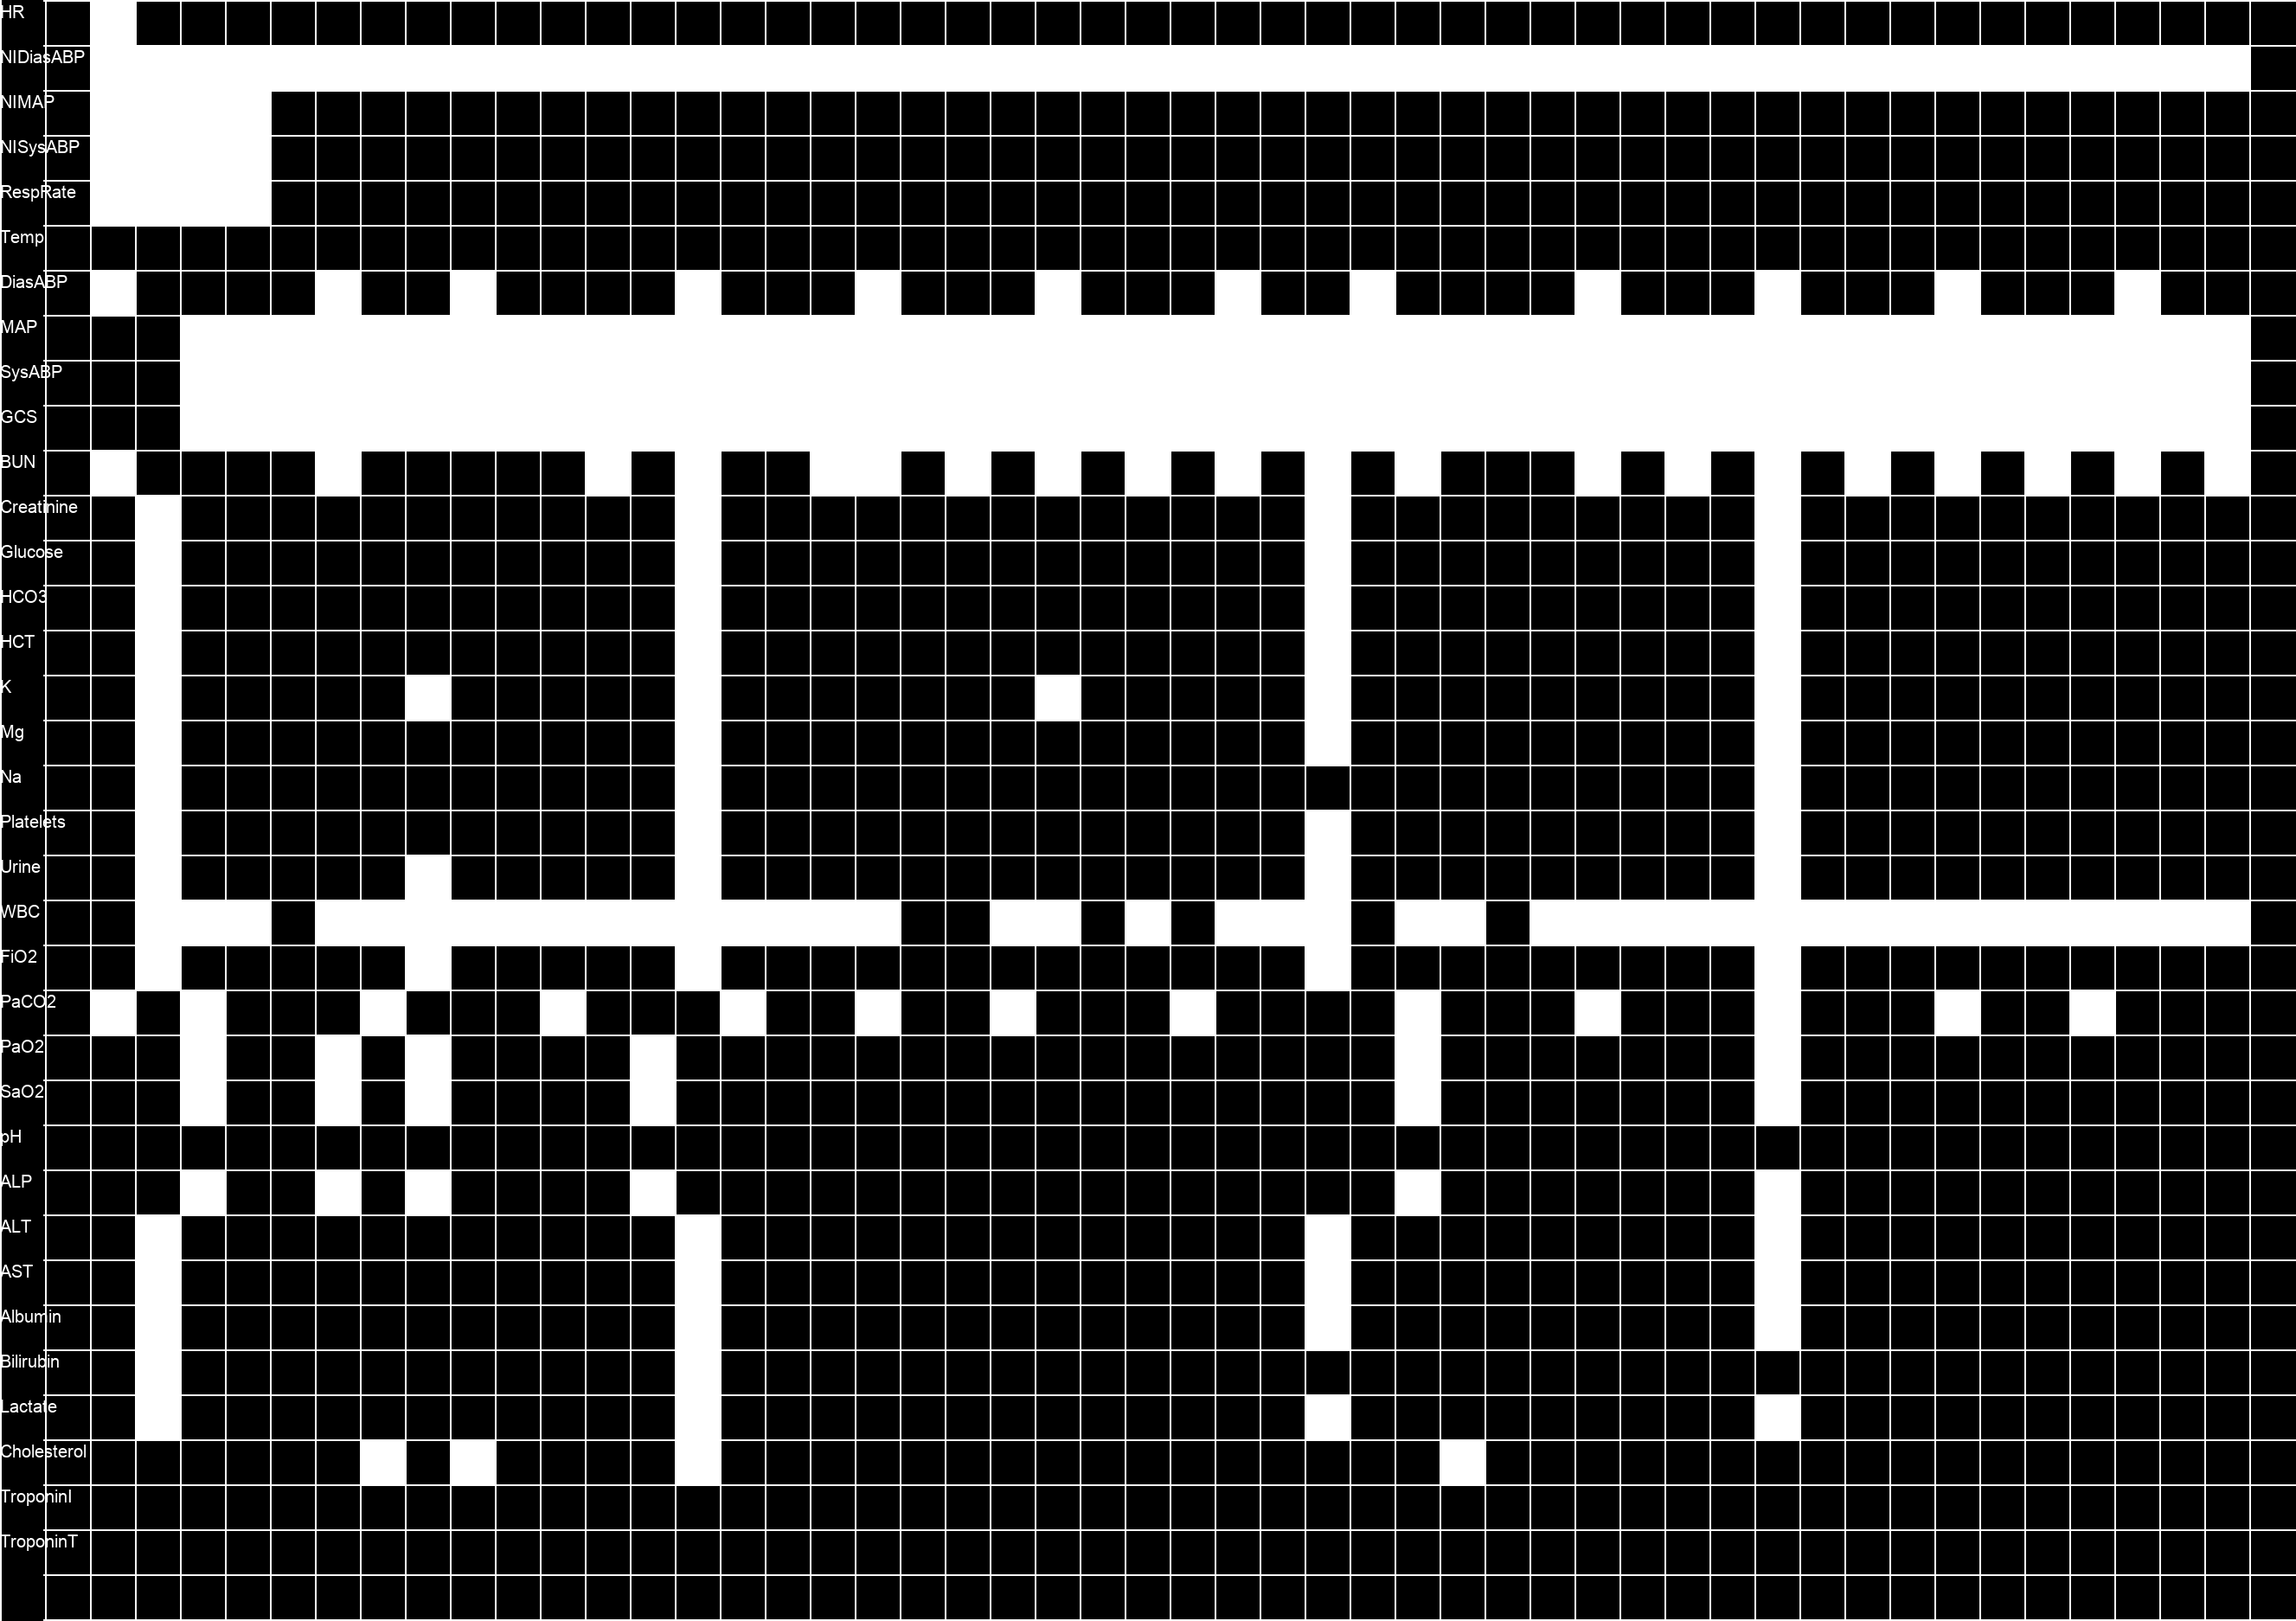

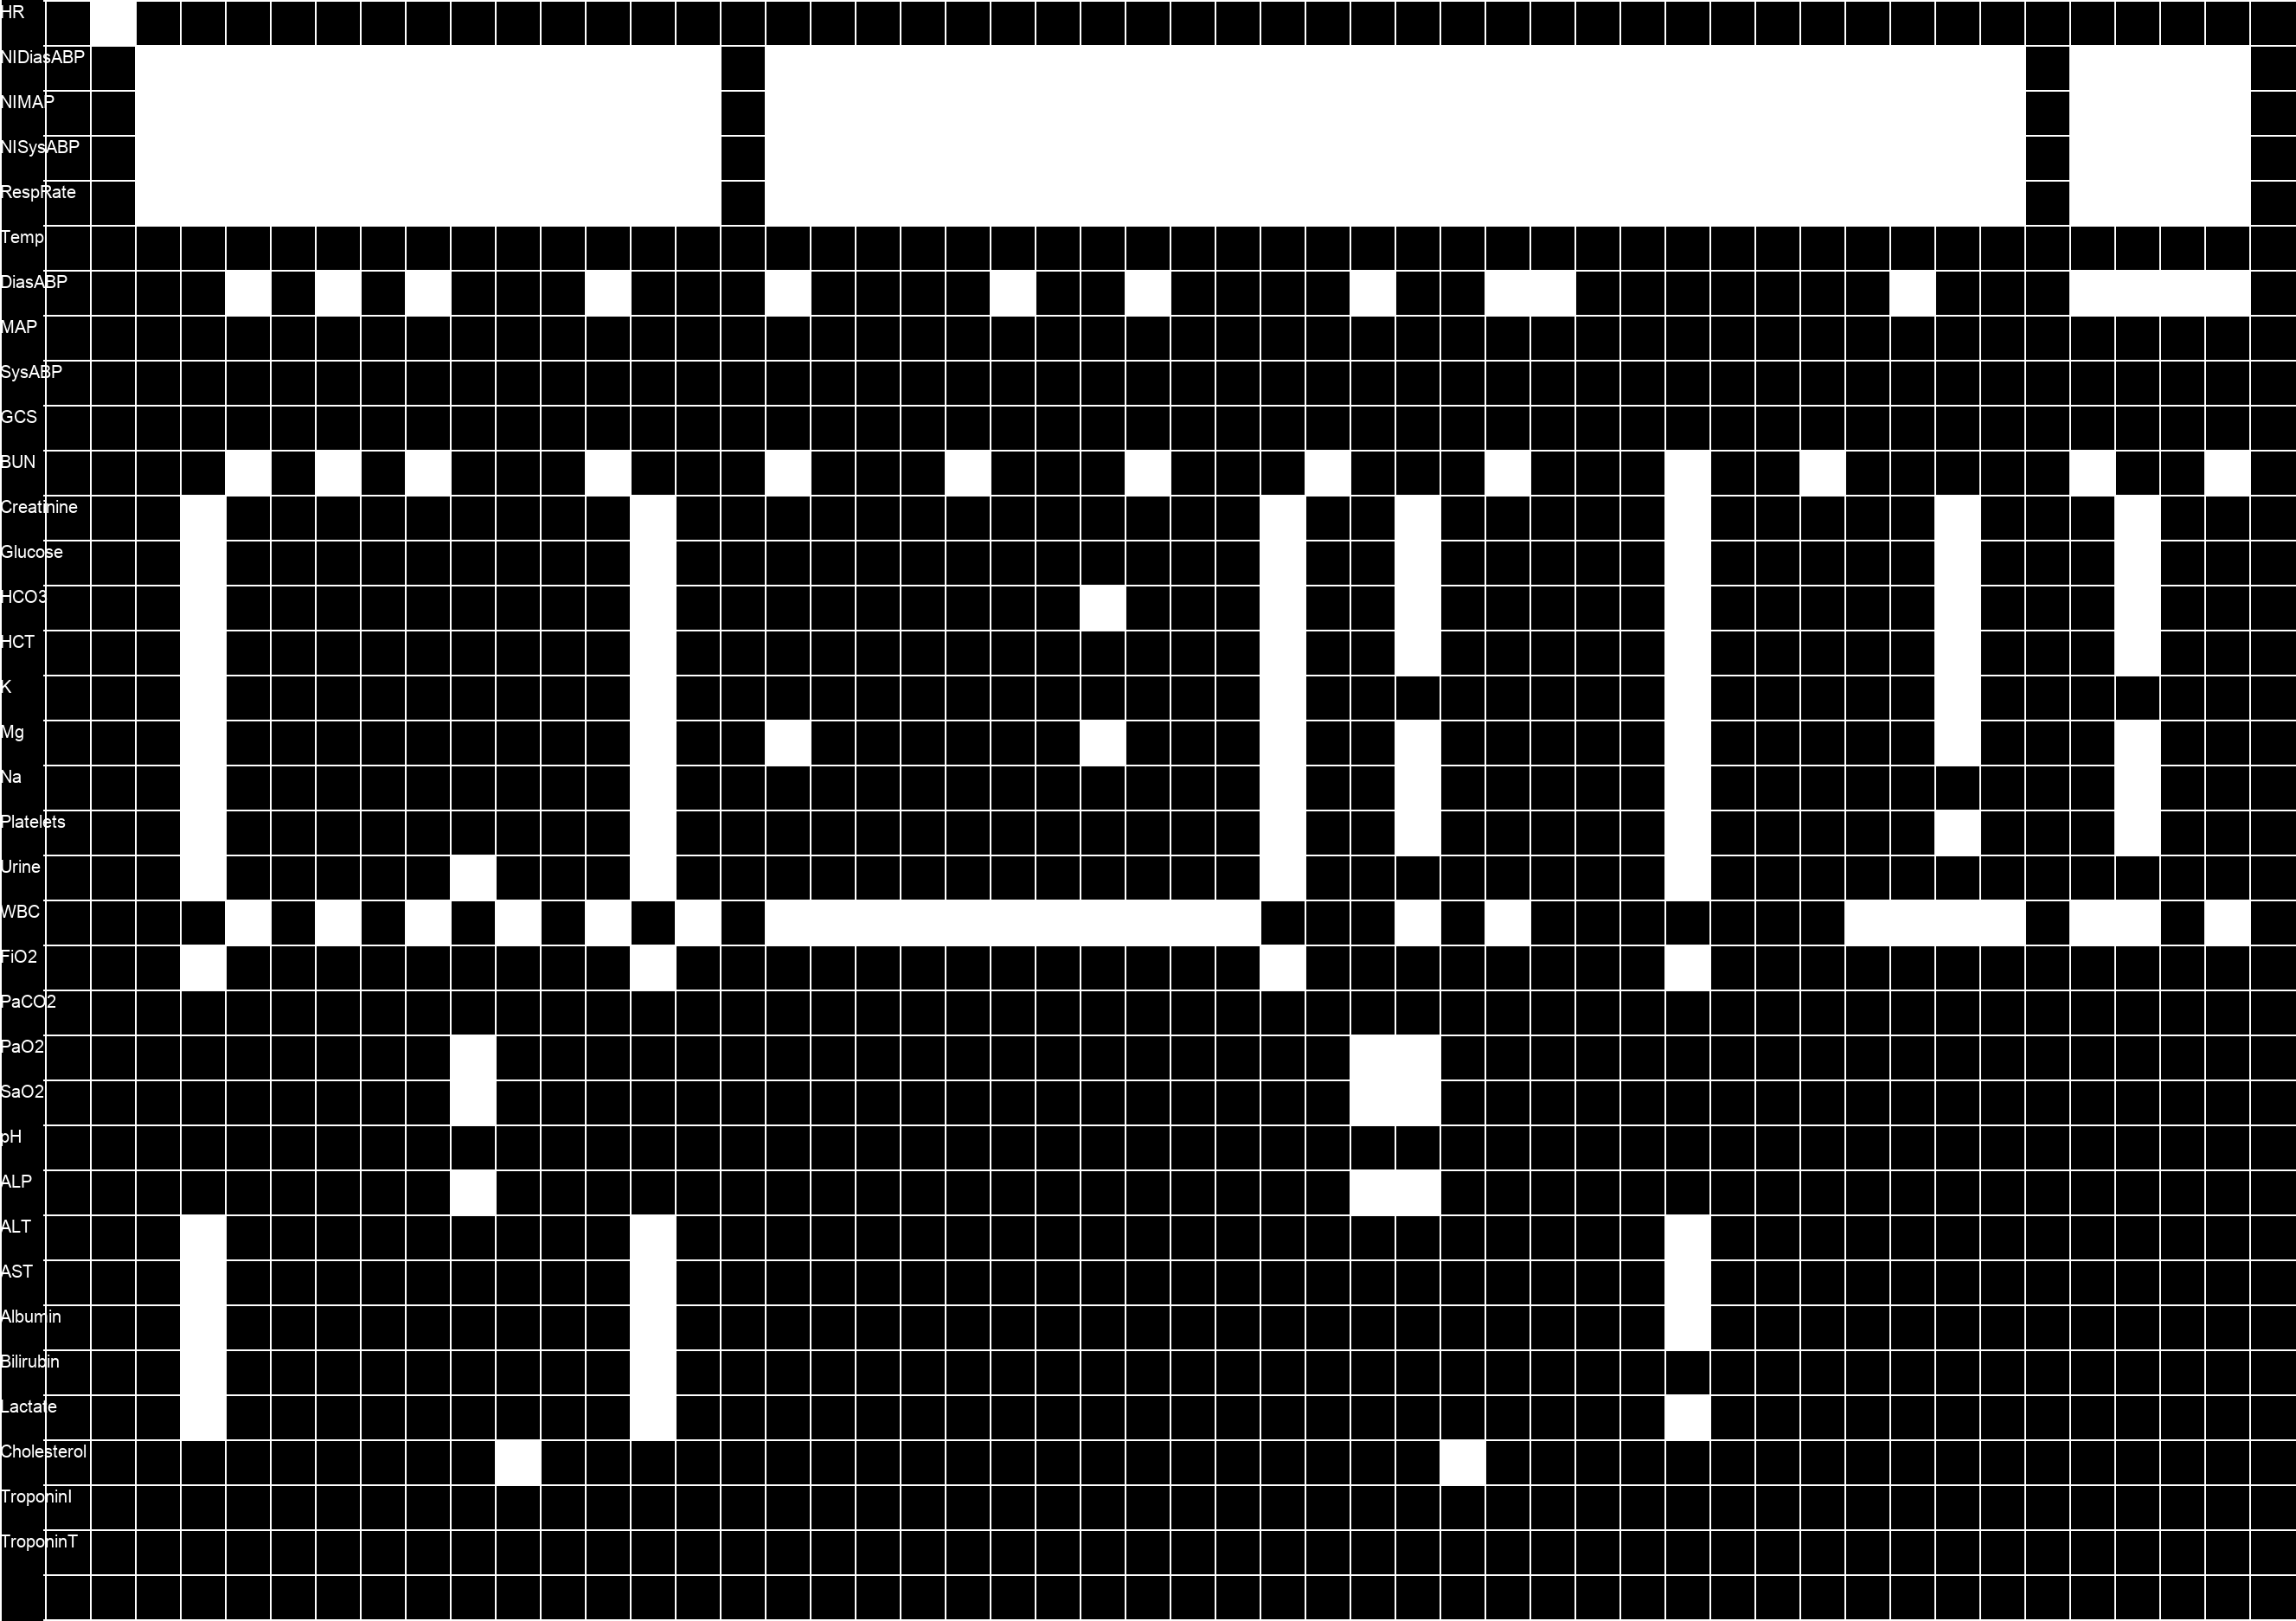

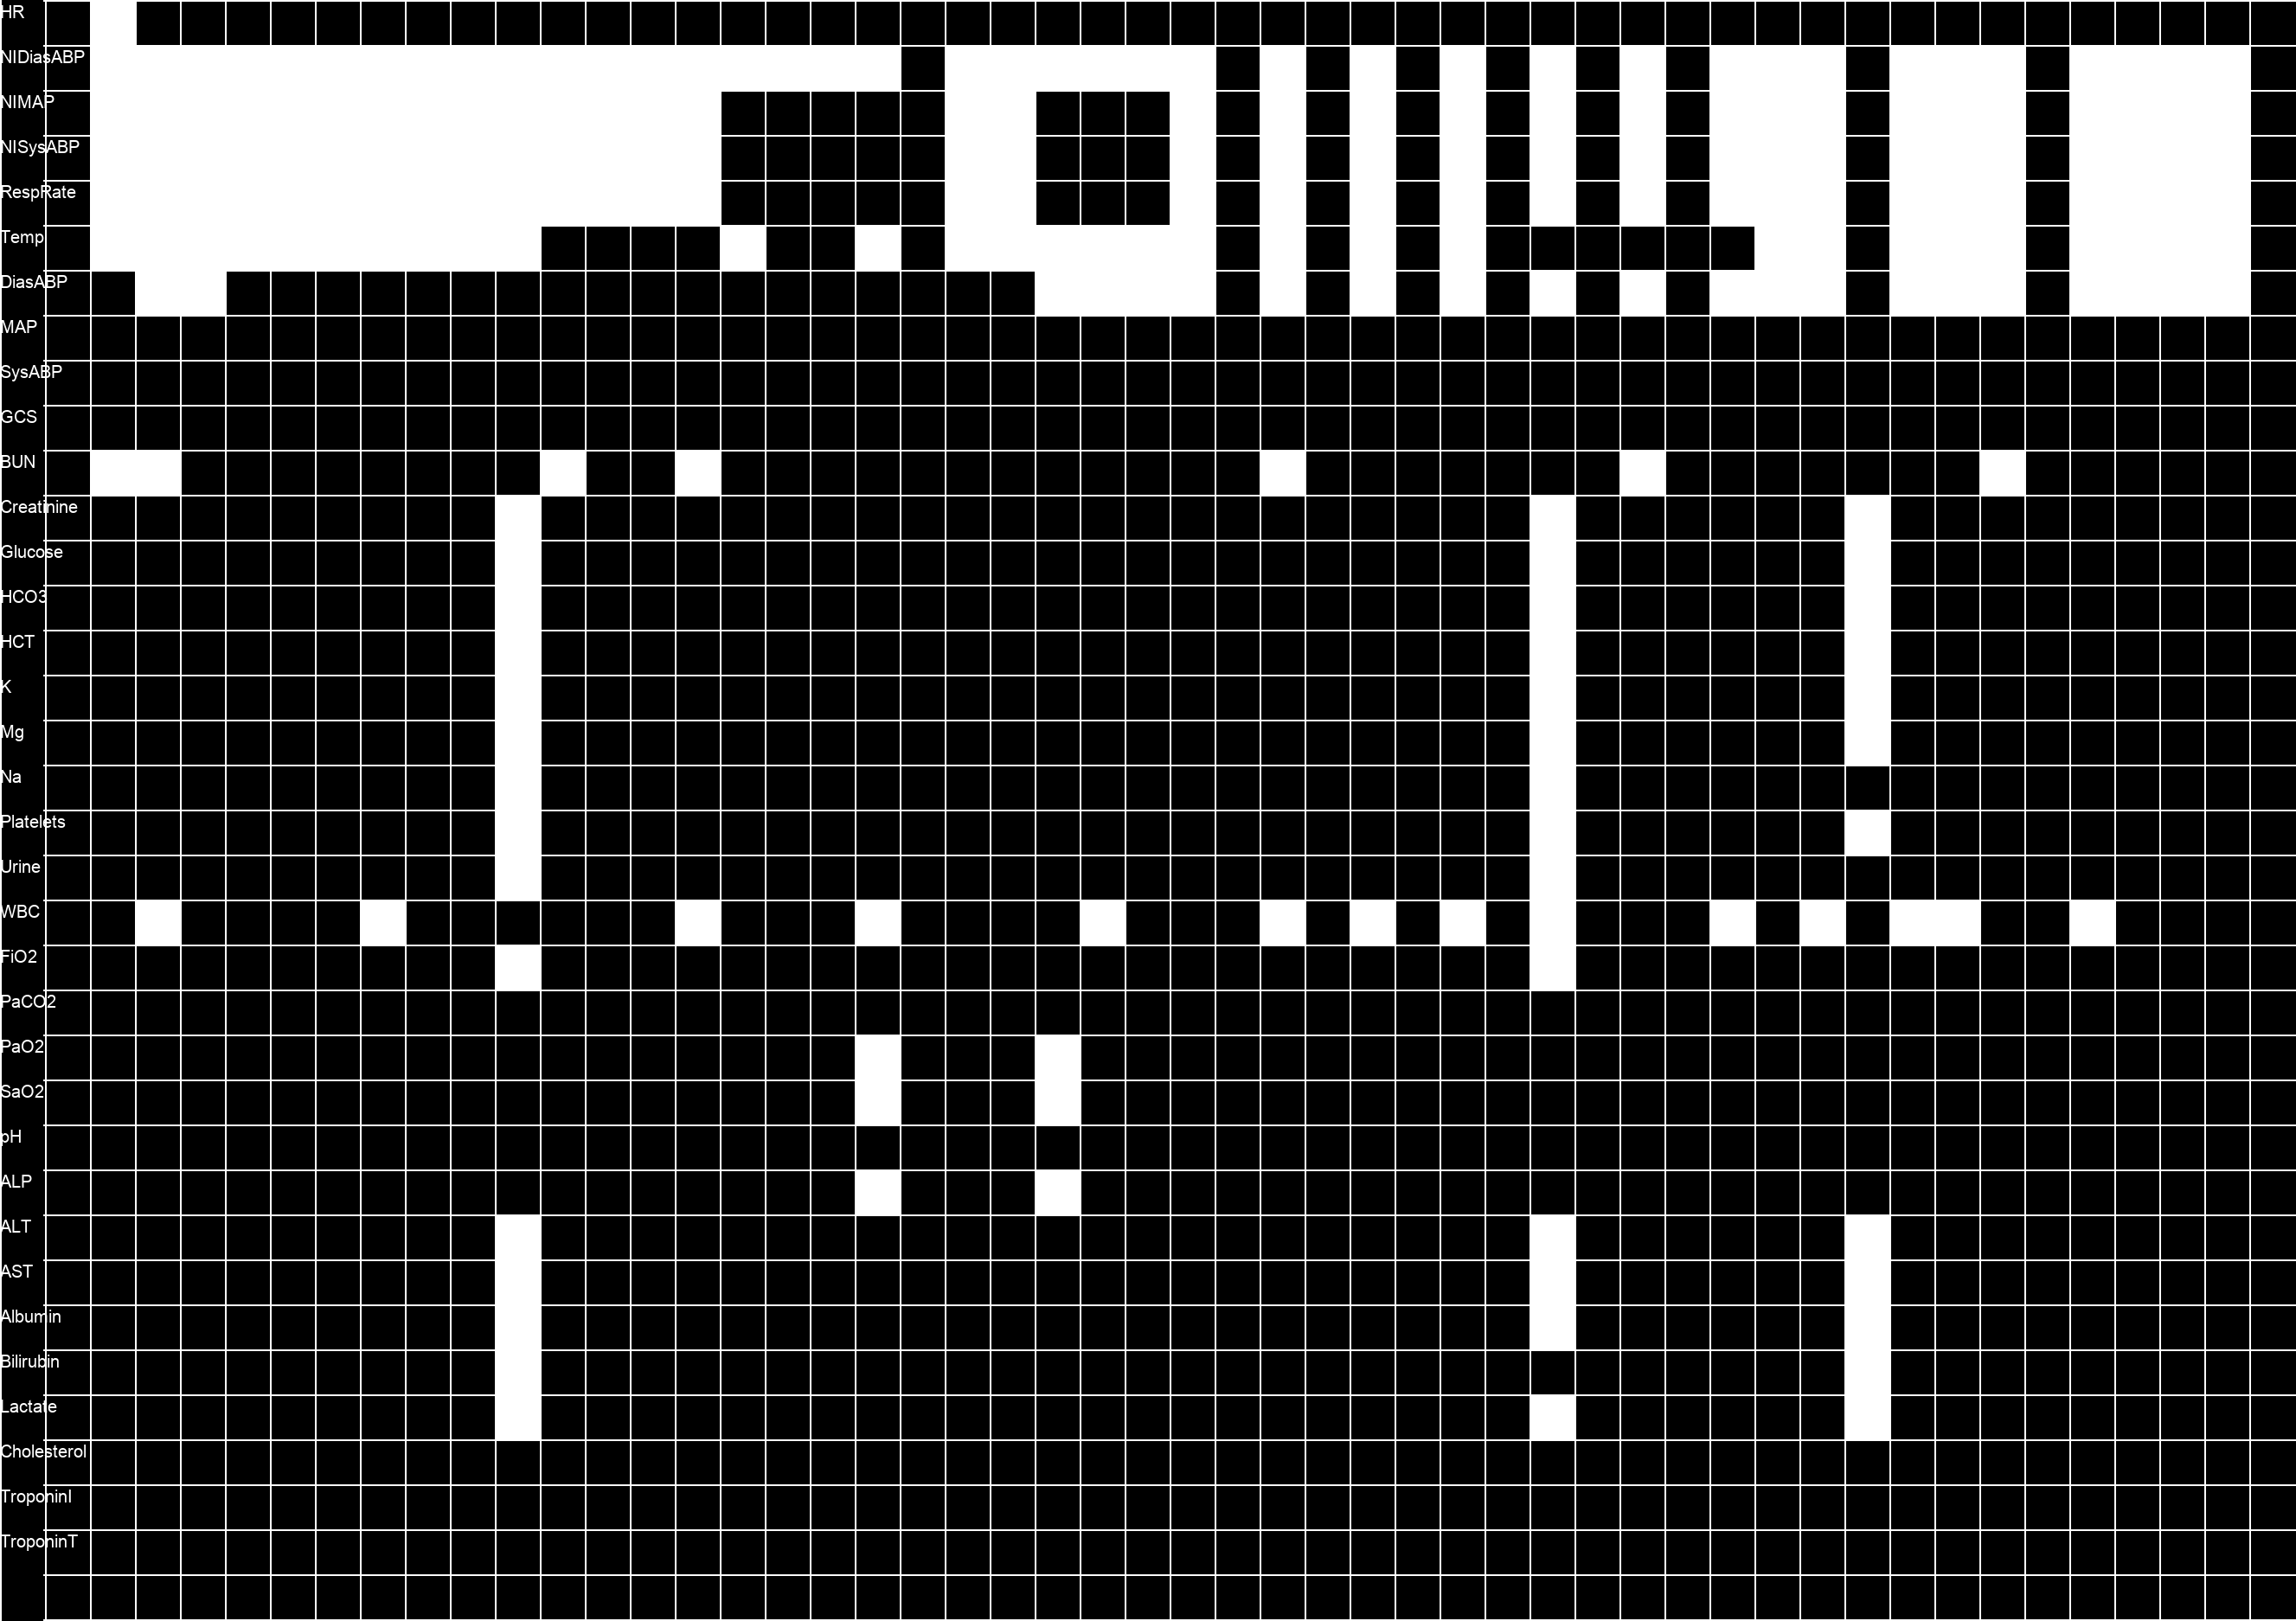

In [32]:


iii=[193,648,983]

for ii in iii:
    im_matrix = res[ii]
    row_labels = opt.dict_map_states.keys()
    im_url = binary_matrix_to_image(im_matrix, row_labels=row_labels, grid_size=50, border_size=2, label_size=20)

    im_url

